In [2]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from mlxtend.preprocessing import minmax_scaling
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,adjusted_rand_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('finishedd.csv')
df.head()

,title,chroma_stft_kew_0,chroma_stft_min_0,chroma_stft_max_0,chroma_stft_std_0,chroma_stft_mean_0,chroma_stft_median_0,chroma_stft_kurtosis_0,chroma_stft_kew_1,chroma_stft_min_1,...,tonnetz_median_5,tonnetz_kurtosis_5,zero_crossing_rate_kew_0,zero_crossing_rate_min_0,zero_crossing_rate_max_0,zero_crossing_rate_std_0,zero_crossing_rate_mean_0,zero_crossing_rate_median_0,zero_crossing_rate_kurtosis_0,popularity
0,God's Plan,0.287141,0.004479,1.0,0.312579,0.461173,0.403628,-1.328911,0.700293,0.011459,...,0.009058,-0.258379,1.077282,0.003906,0.543945,0.077048,0.099394,0.090332,2.041781,0
1,Perfect,0.504776,0.013271,1.0,0.301525,0.464069,0.406287,-0.854697,1.432437,0.015911,...,0.000184,0.098362,1.992432,0.016602,0.372559,0.056317,0.112154,0.101807,5.541481,0
2,Meant To Be,0.127790,0.010105,1.0,0.323879,0.528688,0.495301,-1.284492,0.828981,0.015159,...,-0.018498,-0.098473,0.175335,0.011230,0.441895,0.064299,0.173092,0.172363,-0.002089,0
3,Havana,0.973138,0.003711,1.0,0.329186,0.356747,0.225295,-0.481076,0.858171,0.003366,...,-0.010677,-0.122050,2.739277,0.012207,0.499023,0.064160,0.077137,0.054199,10.982906,0
4,Rockstar,1.282710,0.023767,1.0,0.244426,0.360199,0.278995,0.773033,0.150423,0.094858,...,-0.007895,-0.510129,5.405704,0.004395,0.529785,0.047993,0.041479,0.032715,42.453803,1


drop na rows

In [4]:
# count the number of rows before dropping NaNs
before_count = len(df)

# drop rows with NaNs
df = df.dropna()

# count the number of rows after dropping NaNs
after_count = len(df)

# print the results
print(f"Number of rows before dropping NaNs: {before_count}")
print(f"Number of rows after dropping NaNs: {after_count}")

Number of rows before dropping NaNs: 480
Number of rows after dropping NaNs: 479


histogram plots are saved on a folder called histogramplots

In [ ]:
import matplotlib.pyplot as plt 
import os

# Create 'histogramplots' folder  
os.makedirs('histogramplots', exist_ok=True)

# Loop through each column  
for col in df.columns:

    # Skip title column
    if col == 'title':
        continue
        
    # Generate histogram    
    plt.figure()      
    df[col].hist()
        
    # Add title 
    plt.title(col)
    
    # Save histogram in 'histogramplots' folder       
    plt.savefig(os.path.join('histogramplots', f'hist_{col}.png'))
        
    # Close the plot
    plt.close()

box plots plots are saved on a folder called box_plots

In [6]:
import matplotlib.pyplot as plt
import os

# Make sure the 'box_plots' folder exists     
os.makedirs('box_plots', exist_ok=True)

# Loop through each column name    
for col in df.columns:
    
    # Skip the title column 
    if col == 'title': 
        continue
        
    # Generate a box plot    
    plt.figure()    
    df[col].plot(kind='box')
        
    # Add a title with the column name           
    plt.title(col)
    
    # Save the box plot in 'box_plots' folder        
    plt.savefig(os.path.join('box_plots', f'box_{col}.png'))
    
    # Close the plot      
    plt.close()

In [5]:
dff = df.drop(columns=["title","popularity"],axis=1)

In [6]:
dff

,chroma_stft_kew_0,chroma_stft_min_0,chroma_stft_max_0,chroma_stft_std_0,chroma_stft_mean_0,chroma_stft_median_0,chroma_stft_kurtosis_0,chroma_stft_kew_1,chroma_stft_min_1,chroma_stft_max_1,...,tonnetz_mean_5,tonnetz_median_5,tonnetz_kurtosis_5,zero_crossing_rate_kew_0,zero_crossing_rate_min_0,zero_crossing_rate_max_0,zero_crossing_rate_std_0,zero_crossing_rate_mean_0,zero_crossing_rate_median_0,zero_crossing_rate_kurtosis_0
0,0.287141,0.004479,1.0,0.312579,0.461173,0.403628,-1.328911,0.700293,0.011459,1.0,...,0.011384,0.009058,-0.258379,1.077282,0.003906,0.543945,0.077048,0.099394,0.090332,2.041781
1,0.504776,0.013271,1.0,0.301525,0.464069,0.406287,-0.854697,1.432437,0.015911,1.0,...,0.006620,0.000184,0.098362,1.992432,0.016602,0.372559,0.056317,0.112154,0.101807,5.541481
2,0.127790,0.010105,1.0,0.323879,0.528688,0.495301,-1.284492,0.828981,0.015159,1.0,...,-0.021581,-0.018498,-0.098473,0.175335,0.011230,0.441895,0.064299,0.173092,0.172363,-0.002089
3,0.973138,0.003711,1.0,0.329186,0.356747,0.225295,-0.481076,0.858171,0.003366,1.0,...,-0.002494,-0.010677,-0.122050,2.739277,0.012207,0.499023,0.064160,0.077137,0.054199,10.982906
4,1.282710,0.023767,1.0,0.244426,0.360199,0.278995,0.773033,0.150423,0.094858,1.0,...,0.001323,-0.007895,-0.510129,5.405704,0.004395,0.529785,0.047993,0.041479,0.032715,42.453803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1.391175,0.025805,1.0,0.255388,0.326354,0.246043,1.166754,1.318006,0.026620,1.0,...,0.071812,0.084137,-1.162844,1.731435,0.021484,0.277832,0.030168,0.083831,0.079102,6.180362
476,0.003616,0.001791,1.0,0.343566,0.539838,0.552346,-1.478736,-0.115696,0.002144,1.0,...,0.011228,0.015175,1.474914,2.227799,0.002441,0.437500,0.075614,0.063537,0.032227,5.348424
477,0.557207,0.012479,1.0,0.266338,0.422065,0.378385,-0.630555,0.386382,0.020882,1.0,...,-0.036268,-0.025684,0.750538,1.181360,0.007812,0.287109,0.054640,0.078792,0.062012,0.909554
478,0.457956,0.015729,1.0,0.328283,0.472273,0.378055,-1.217103,1.192691,0.030664,1.0,...,-0.004521,-0.009354,1.623681,0.649799,0.046387,0.282227,0.038147,0.132229,0.126709,0.443684


lets remove outliers

In [6]:
# Calculate Q1, Q3, and IQR for each column and identify outliers
for col in dff.columns:
    q1 = np.percentile(dff[col], 25)
    q3 = np.percentile(dff[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = dff[col][((dff[col] < lower_bound) | (dff[col] > upper_bound))]

    dff[col][dff[col] < lower_bound] = lower_bound
    dff[col][dff[col] > upper_bound] = upper_bound

In [8]:
dff

,chroma_stft_kew_0,chroma_stft_min_0,chroma_stft_max_0,chroma_stft_std_0,chroma_stft_mean_0,chroma_stft_median_0,chroma_stft_kurtosis_0,chroma_stft_kew_1,chroma_stft_min_1,chroma_stft_max_1,...,tonnetz_mean_5,tonnetz_median_5,tonnetz_kurtosis_5,zero_crossing_rate_kew_0,zero_crossing_rate_min_0,zero_crossing_rate_max_0,zero_crossing_rate_std_0,zero_crossing_rate_mean_0,zero_crossing_rate_median_0,zero_crossing_rate_kurtosis_0
0,0.287141,0.004479,1.0,0.312579,0.461173,0.403628,-1.328911,0.700293,0.011459,1.0,...,0.011384,0.009058,-0.258379,1.077282,0.003906,0.543945,0.077048,0.099394,0.090332,2.041781
1,0.504776,0.013271,1.0,0.301525,0.464069,0.406287,-0.854697,1.432437,0.015911,1.0,...,0.006620,0.000184,0.098362,1.992432,0.016602,0.372559,0.056317,0.112154,0.101807,5.541481
2,0.127790,0.010105,1.0,0.323879,0.528688,0.495301,-1.284492,0.828981,0.015159,1.0,...,-0.021581,-0.018498,-0.098473,0.175335,0.011230,0.441895,0.064299,0.173092,0.167664,-0.002089
3,0.973138,0.003711,1.0,0.329186,0.356747,0.225295,-0.481076,0.858171,0.003366,1.0,...,-0.002494,-0.010677,-0.122050,2.739277,0.012207,0.499023,0.064160,0.077137,0.054199,10.982906
4,1.282710,0.023767,1.0,0.244426,0.360199,0.278995,0.773033,0.150423,0.046211,1.0,...,0.001323,-0.007895,-0.510129,4.356107,0.004395,0.529785,0.047993,0.041479,0.032715,20.109394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1.391175,0.025805,1.0,0.255388,0.326354,0.246043,1.166754,1.318006,0.026620,1.0,...,0.055104,0.049358,-1.162844,1.731435,0.021484,0.277832,0.030168,0.083831,0.079102,6.180362
476,0.003616,0.001791,1.0,0.343566,0.539838,0.552346,-1.478736,-0.115696,0.002144,1.0,...,0.011228,0.015175,1.474914,2.227799,0.002441,0.437500,0.075614,0.063537,0.032227,5.348424
477,0.557207,0.012479,1.0,0.266338,0.422065,0.378385,-0.630555,0.386382,0.020882,1.0,...,-0.036268,-0.025684,0.750538,1.181360,0.007812,0.287109,0.054640,0.078792,0.062012,0.909554
478,0.457956,0.015729,1.0,0.328283,0.472273,0.378055,-1.217103,1.192691,0.030664,1.0,...,-0.004521,-0.009354,1.623681,0.649799,0.044312,0.282227,0.038147,0.132229,0.126709,0.443684


plot box plots again

In [67]:
import matplotlib.pyplot as plt
import os

# Make sure the 'box_plots' folder exists     
os.makedirs('box_plots_outliers', exist_ok=True)

# Loop through each column name    
for col in dff.columns:
    
    # Skip the title column 
    if col == 'title': 
        continue
        
    # Generate a box plot    
    plt.figure()    
    dff[col].plot(kind='box')
        
    # Add a title with the column name           
    plt.title(col)
    
    # Save the box plot in 'box_plots_outliers' folder        
    plt.savefig(os.path.join('box_plots_outliers', f'box_{col}.png'))
    
    # Close the plot      
    plt.close()

after looking through all box plots some feutures needed scaling i am considering normalizing all the feutures 

lets do pca analysis to get the most imp feutures

In [7]:
xx = dff
y = df['popularity']
xx

,chroma_stft_kew_0,chroma_stft_min_0,chroma_stft_max_0,chroma_stft_std_0,chroma_stft_mean_0,chroma_stft_median_0,chroma_stft_kurtosis_0,chroma_stft_kew_1,chroma_stft_min_1,chroma_stft_max_1,...,tonnetz_mean_5,tonnetz_median_5,tonnetz_kurtosis_5,zero_crossing_rate_kew_0,zero_crossing_rate_min_0,zero_crossing_rate_max_0,zero_crossing_rate_std_0,zero_crossing_rate_mean_0,zero_crossing_rate_median_0,zero_crossing_rate_kurtosis_0
0,0.287141,0.004479,1.0,0.312579,0.461173,0.403628,-1.328911,0.700293,0.011459,1.0,...,0.011384,0.009058,-0.258379,1.077282,0.003906,0.543945,0.077048,0.099394,0.090332,2.041781
1,0.504776,0.013271,1.0,0.301525,0.464069,0.406287,-0.854697,1.432437,0.015911,1.0,...,0.006620,0.000184,0.098362,1.992432,0.016602,0.372559,0.056317,0.112154,0.101807,5.541481
2,0.127790,0.010105,1.0,0.323879,0.528688,0.495301,-1.284492,0.828981,0.015159,1.0,...,-0.021581,-0.018498,-0.098473,0.175335,0.011230,0.441895,0.064299,0.173092,0.167664,-0.002089
3,0.973138,0.003711,1.0,0.329186,0.356747,0.225295,-0.481076,0.858171,0.003366,1.0,...,-0.002494,-0.010677,-0.122050,2.739277,0.012207,0.499023,0.064160,0.077137,0.054199,10.982906
4,1.282710,0.023767,1.0,0.244426,0.360199,0.278995,0.773033,0.150423,0.046211,1.0,...,0.001323,-0.007895,-0.510129,4.356107,0.004395,0.529785,0.047993,0.041479,0.032715,20.109394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1.391175,0.025805,1.0,0.255388,0.326354,0.246043,1.166754,1.318006,0.026620,1.0,...,0.055104,0.049358,-1.162844,1.731435,0.021484,0.277832,0.030168,0.083831,0.079102,6.180362
476,0.003616,0.001791,1.0,0.343566,0.539838,0.552346,-1.478736,-0.115696,0.002144,1.0,...,0.011228,0.015175,1.474914,2.227799,0.002441,0.437500,0.075614,0.063537,0.032227,5.348424
477,0.557207,0.012479,1.0,0.266338,0.422065,0.378385,-0.630555,0.386382,0.020882,1.0,...,-0.036268,-0.025684,0.750538,1.181360,0.007812,0.287109,0.054640,0.078792,0.062012,0.909554
478,0.457956,0.015729,1.0,0.328283,0.472273,0.378055,-1.217103,1.192691,0.030664,1.0,...,-0.004521,-0.009354,1.623681,0.649799,0.044312,0.282227,0.038147,0.132229,0.126709,0.443684


In [8]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the data
normalized_data = scaler.fit_transform(xx)

# Convert the normalized data back to a pandas DataFrame
X_std = pd.DataFrame(normalized_data, columns=xx.columns)

X_std

,chroma_stft_kew_0,chroma_stft_min_0,chroma_stft_max_0,chroma_stft_std_0,chroma_stft_mean_0,chroma_stft_median_0,chroma_stft_kurtosis_0,chroma_stft_kew_1,chroma_stft_min_1,chroma_stft_max_1,...,tonnetz_mean_5,tonnetz_median_5,tonnetz_kurtosis_5,zero_crossing_rate_kew_0,zero_crossing_rate_min_0,zero_crossing_rate_max_0,zero_crossing_rate_std_0,zero_crossing_rate_mean_0,zero_crossing_rate_median_0,zero_crossing_rate_kurtosis_0
0,-0.694524,-0.799438,0.0,0.642015,0.362760,0.326687,-0.940019,0.019895,-0.258420,0.0,...,0.385086,0.449613,-0.685283,-0.743602,-0.868027,1.021119,1.010434,0.231784,0.314068,-0.693544
1,-0.311196,-0.153397,0.0,0.407845,0.386604,0.344698,-0.521233,1.429682,0.078484,0.0,...,0.177598,0.038357,-0.304852,0.141932,0.222144,-0.123817,0.035887,0.624475,0.662060,-0.100250
2,-0.975194,-0.386021,0.0,0.881390,0.918637,0.947626,-0.900791,0.267691,0.021550,0.0,...,-1.050733,-0.827377,-0.514758,-1.616360,-0.239082,0.339376,0.411134,2.499797,2.659317,-1.040036
3,0.513746,-0.855897,0.0,0.993792,-0.497018,-0.881235,-0.191283,0.323898,-0.870895,0.0,...,-0.219390,-0.464938,-0.539901,0.864606,-0.155223,0.721022,0.404603,-0.453158,-0.781740,0.822221
4,1.059004,0.617948,0.0,-0.801732,-0.468601,-0.517502,0.916239,-1.038913,2.371498,0.0,...,-0.053109,-0.336009,-0.953751,2.429111,-0.826098,0.926523,-0.355373,-1.550517,-1.433301,2.369410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,1.250047,0.767700,0.0,-0.569505,-0.747259,-0.740698,1.263939,1.209337,0.888951,0.0,...,2.289365,2.317156,-1.649811,-0.110619,0.641441,-0.756631,-1.193274,-0.247159,-0.026521,0.008058
475,-1.193905,-0.996999,0.0,1.298430,1.010435,1.334014,-1.072331,-1.551340,-0.963364,0.0,...,0.378296,0.733053,1.163114,0.369682,-0.993816,0.310019,0.943012,-0.871692,-1.448109,-0.132978
476,-0.218847,-0.211548,0.0,-0.337555,0.040766,0.155706,-0.323289,-0.584560,0.454717,0.0,...,-1.690422,-1.160402,0.390634,-0.642892,-0.532590,-0.694654,-0.042913,-0.402240,-0.544808,-0.885488
477,-0.393661,0.027264,0.0,0.974669,0.454149,0.153468,-0.841279,0.968036,1.195001,0.0,...,-0.307647,-0.403653,1.321761,-1.157251,2.601653,-0.727273,-0.818201,1.242263,1.417279,-0.964465


lets start with most of principal components and plot cumulative explained variance with number of componenets to get a general idea

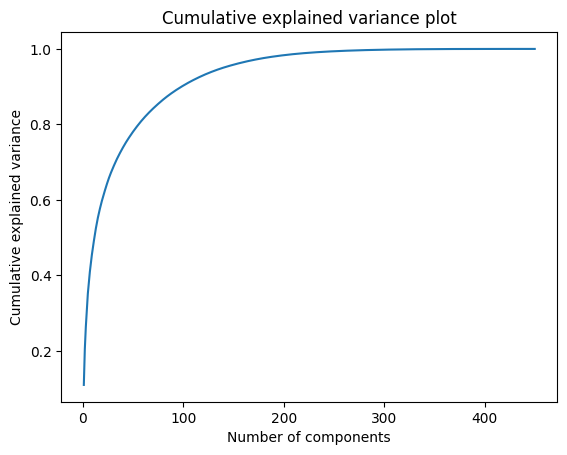

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to the standardized data
pca = PCA(n_components=450)
X_pca = pca.fit_transform(X_std)

# Calculate the cumulative explained variance
cumulative_var = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance plot')
plt.show()


okay so around 150-300

In [14]:
# Initialize PCA with n_components to be 300
pca = PCA(n_components=300)

# Apply PCA to X_std
X_pca = pca.fit_transform(X_std)

# Check the variance before and after PCA
print('Variance before PCA:', np.var(X_std))
print('Variance after PCA:', np.var(X_pca))

# Calculate the percentage of variance explained by each principal component
explained_variances = pca.explained_variance_ratio_

# Find the cumulative sum of explained variances up to the 300th principal component
cumulative_sum = np.cumsum(explained_variances)

# Print the amount of variance preserved by the 300 principal components
print('Variance preserved by 300 principal components:', cumulative_sum[-1])

Variance before PCA: chroma_stft_kew_0                1.0
chroma_stft_min_0                1.0
chroma_stft_max_0                0.0
chroma_stft_std_0                1.0
chroma_stft_mean_0               1.0
                                ... 
zero_crossing_rate_max_0         1.0
zero_crossing_rate_std_0         1.0
zero_crossing_rate_mean_0        1.0
zero_crossing_rate_median_0      1.0
zero_crossing_rate_kurtosis_0    1.0
Length: 518, dtype: float64
Variance after PCA: 1.6499932332274554
Variance preserved by 300 principal components: 0.9979797781617683


that is quite high lets find number of components for 97 percent

In [15]:
import numpy as np
from sklearn.decomposition import PCA


# Initialize PCA with n_components to be 200
pca = PCA(n_components=200)

# Apply PCA to X_std
X_pca = pca.fit_transform(X_std)

# Calculate the percentage of variance explained by each principal component
explained_variances = pca.explained_variance_ratio_

# Find the cumulative sum of explained variances up to each principal component
cumulative_sum = np.cumsum(explained_variances)

# Find the number of principal components that preserve 95% of the variance
n_components_97 = np.argmax(cumulative_sum >= 0.97) + 1

# Print the number of features that are preserved
if n_components_97 < X_std.shape[1]:
    print(f"Number of features preserved to maintain 97% variance is: {n_components_97}")
else:
    print("All features are preserved.")

Number of features preserved to maintain 97% variance is: 169


will go with 170

In [16]:
# Initialize PCA with n_components to be 170
pca = PCA(n_components=170)

# Apply PCA to X_std
X_pca = pca.fit_transform(X_std)

In [17]:
# Create a new DataFrame with the principal components
col_names = [f'PC{i+1}' for i in range(170)]
df_pca = pd.DataFrame(data=X_pca, columns=col_names)

# Add the target column (if any) to the new DataFrame
df_pca['popularity'] = y

In [18]:
print(df_pca)

          PC1        PC2        PC3       PC4       PC5       PC6       PC7  \
0    2.558446   7.667847   3.012536  0.686179 -3.758340  3.662345  0.514546   
1    0.449737  -5.145523  -5.989377  8.224807  5.703243  2.962932 -0.881486   
2    1.997919  -7.594498   5.675312  6.592912 -3.601135 -1.256083 -3.963875   
3    7.393584   3.778963  -5.322428  3.934288 -5.718440 -2.397215  1.586972   
4   -1.296040  10.540817  -5.531827  2.318513 -1.529023 -2.839259  4.734376   
..        ...        ...        ...       ...       ...       ...       ...   
474  3.629768  -3.263025 -11.466133 -8.931923 -3.350169  1.334907  1.374550   
475 -4.383390  10.005526   4.846443 -1.954756 -3.624644 -3.287394  1.149790   
476 -3.700360   5.738619  -3.779880 -1.625025  1.493194 -2.096510 -3.525113   
477 -6.308721  -9.427647  -6.520598 -1.125528 -5.725523  1.686390 -2.899237   
478  1.158377  -6.441293  -1.199086 -7.669868  2.625378  4.641906 -2.123407   

          PC8       PC9      PC10  ...     PC162   

<Axes: >

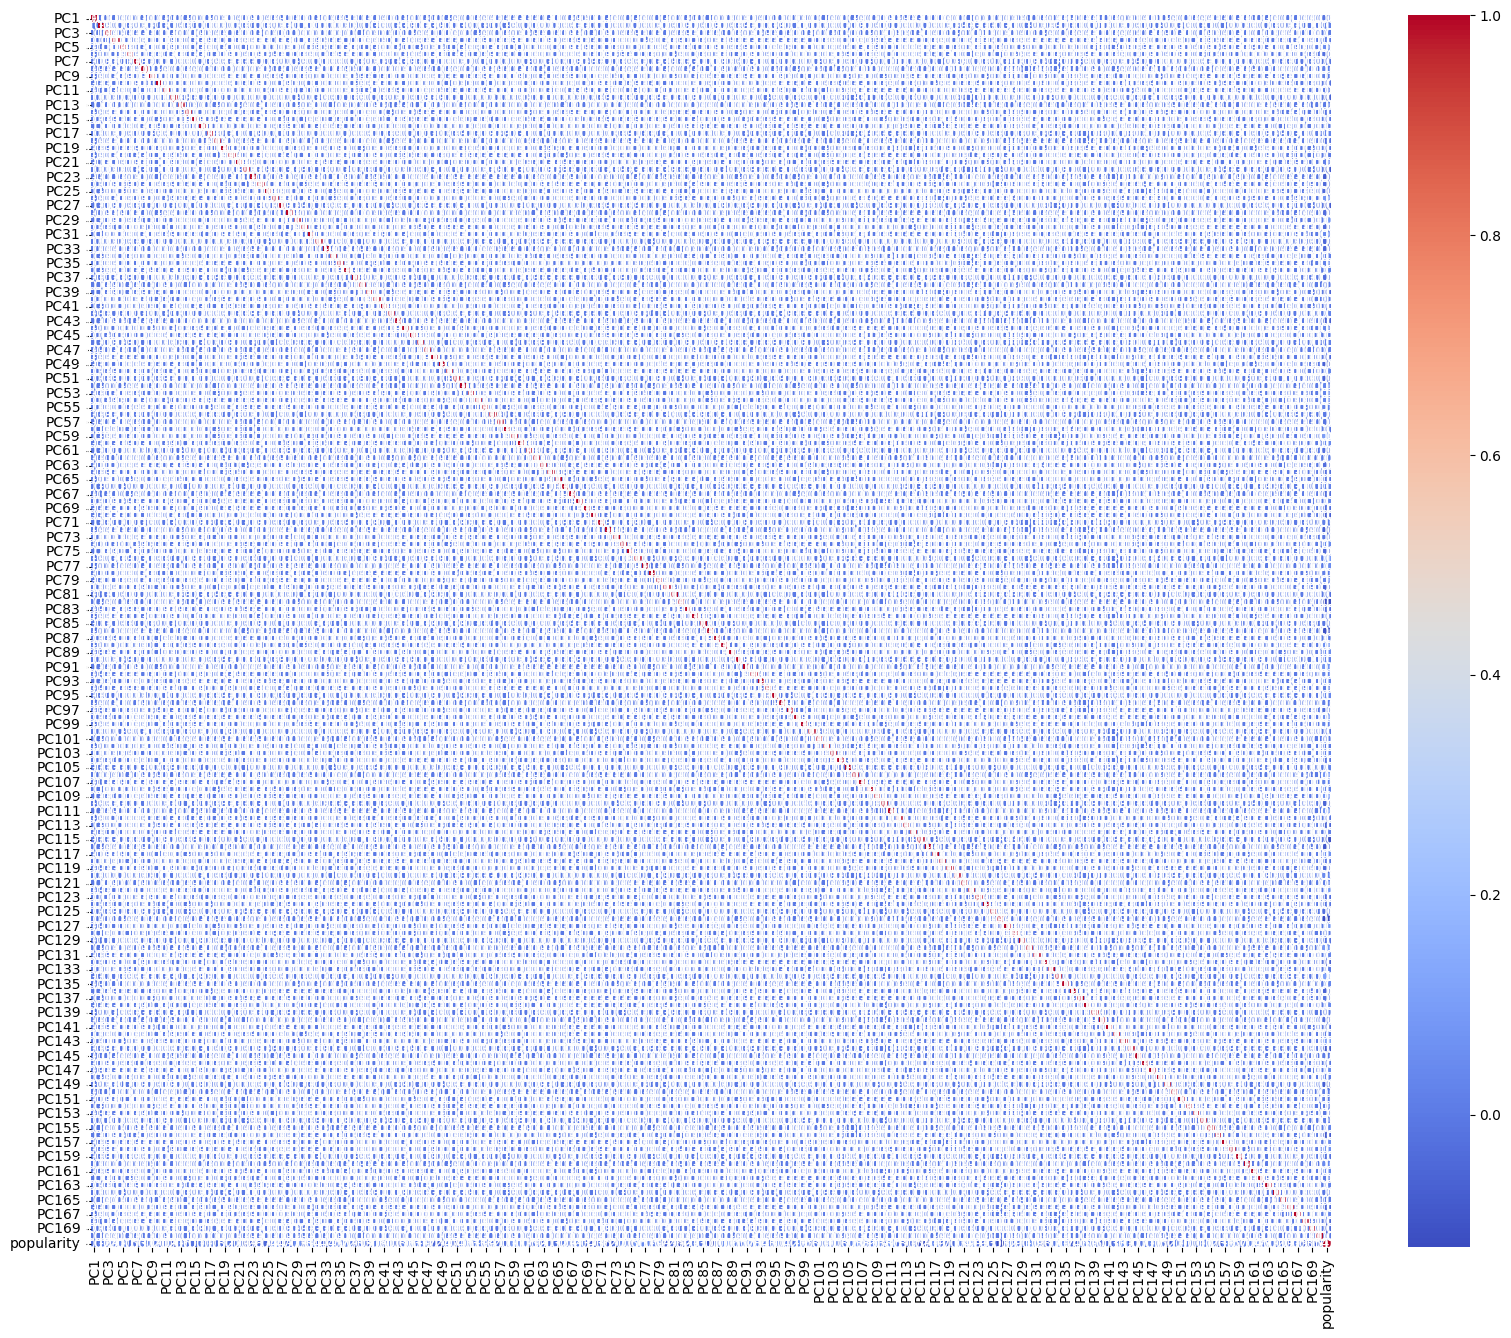

In [74]:
# Generate a correlation matrix 
corr = df_pca.corr()

# Generate a heatmap 
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")


In [ ]:
import matplotlib.pyplot as plt 
import os


# Loop through each column  
for col in df_pca.columns:

    # Generate histogram    
    plt.figure()      
    df_pca[col].hist()
        
    # Add title 
    plt.title(col)
        
    plt.show()

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
import os

# Loop through each column  
for col in df_pca.columns:
   
    # Generate KDE plot    
    sns.displot(df_pca[col], kind="kde")
        
    # Add title      
    plt.title(col)
    plt.show()

In [ ]:
import seaborn as sns
import os

# Create 'violin_plots' folder
os.makedirs('violin_plots', exist_ok=True)

for col in df_pca.columns:
    
    # Skip non-feature columns
    if col == 'popularity':
        continue
        
    # Generate violin plot    
    sns.violinplot(x=col, data=df_pca)
        
    # Add title    
    plt.title(col)
          
    plt.show()

In [ ]:
# scatter plot each pair of columns
for i in range(len(df_pca.columns)):
    for j in range(i+1, len(df_pca.columns)):
        plt.figure(figsize=(8, 6))
        plt.scatter(df_pca.iloc[:, i], df_pca.iloc[:, j])
        plt.title(f'Scatter Plot of "{df_pca.columns[i]}" vs. "{df_pca.columns[j]}"')
        plt.xlabel(df_pca.columns[i])
        plt.ylabel(df_pca.columns[j])
        plt.show()


make a dataframe to use in next task

In [14]:
df_pca.to_csv('eda_finishedd.csv', index=False)